<a href="https://colab.research.google.com/github/anishkuvelkar/MNIST_NN_digitclassification/blob/main/MNIST_Digit_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [8]:
tf.random.set_seed(42)

#Loading MNIST dataset

In [9]:
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [10]:
type(X_train)

numpy.ndarray

In [11]:
X_test.shape,X_train.shape,Y_test.shape,Y_train.shape

((10000, 28, 28), (60000, 28, 28), (10000,), (60000,))

#Already Grayscale

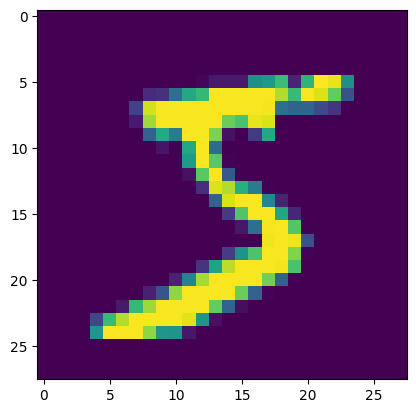

In [12]:
plt.imshow(X_train[0])

In [13]:
print(Y_train[0])

5


In [15]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [16]:
#Scaling the values
X_sca = X_train/255
X_test_sca = X_test/255

Building a NN

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])


In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.fit(X_sca,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2893 - accuracy: 0.9165
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1370 - accuracy: 0.9595
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1033 - accuracy: 0.9689
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0841 - accuracy: 0.9751
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0715 - accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0603 - accuracy: 0.9808
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0524 - accuracy: 0.9832
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0466 - accuracy: 0.9851
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0389 - accuracy: 0.9869
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.036

In [21]:
loss,accuracy = model.evaluate(X_test_sca,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1031 - accuracy: 0.9721


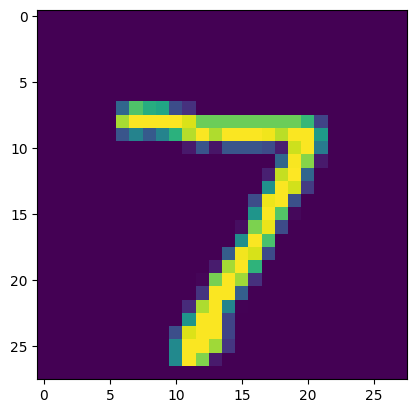

In [24]:
plt.imshow(X_test[0])
plt.show()

In [25]:
print(Y_test[0])

7


In [26]:
Y_pred = model.predict(X_test_sca)

313/313 [==============================] - 1s 2ms/step


In [27]:
Y_pred.shape

(10000, 10)

In [28]:
Y_pred[0]

array([3.14134918e-02, 1.80257868e-03, 1.12336956e-01, 9.24185276e-01,
       2.12434577e-04, 8.23105744e-04, 1.23978374e-08, 9.99999523e-01,
       6.12866320e-03, 2.14468271e-01], dtype=float32)

#Model.predict gives the probability for each class

In [32]:
label = [ np.argmax(i) for i in Y_pred ]

In [33]:
print(label)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 3, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Text(50.722222222222214, 0.5, 'Truth')

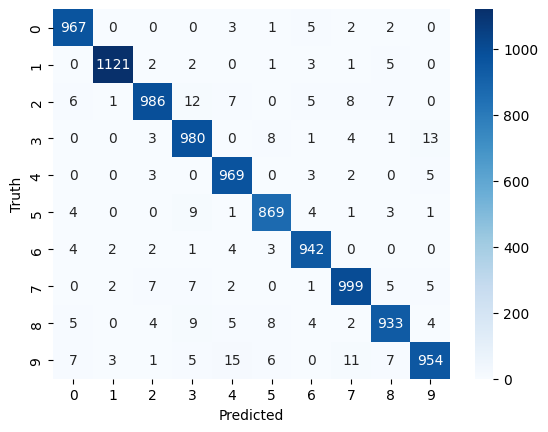

In [36]:
sns.heatmap(confusion_matrix(Y_test,label),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#Building a predictive sysem

In [37]:
image ='/content/mnistdata1.jpg'
inp_img = cv2.imread(image)

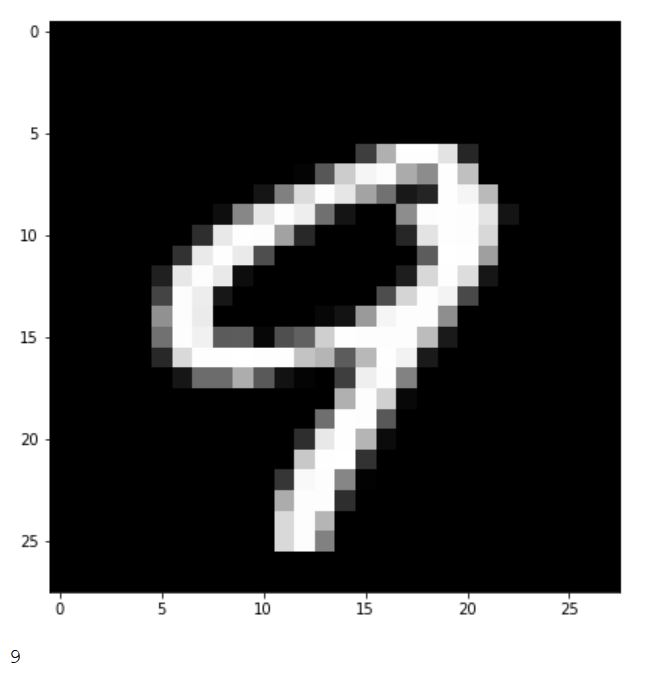

In [38]:
cv2_imshow(inp_img)

In [40]:
inp_img.shape

(682, 649, 3)

In [41]:
type(inp_img)

numpy.ndarray

#Convert to grayscale

In [42]:
inp_img = cv2.cvtColor(inp_img,cv2.COLOR_BGR2GRAY)

In [43]:
inp_img.shape

(682, 649)

In [44]:
inp_img = cv2.resize(inp_img,(28,28))

In [45]:
inp_img.shape

(28, 28)

In [46]:
inp_img = inp_img/255

In [47]:
inp_img = np.reshape(inp_img,[1,28,28])

In [48]:
input_pred = model.predict(inp_img)
print(input_pred)

1/1 [==============================] - 0s 77ms/step
[[3.8188737e-09 2.7966136e-20 6.9584131e-01 9.9996680e-01 2.0887577e-28
  1.9329776e-11 1.0298773e-34 1.0000000e+00 1.3932520e-18 4.3203920e-01]]


In [49]:
arg_max = np.argmax(input_pred)
print(arg_max)

7
